## Harmonic Oscillator Potential



### 1. Launch packages 

In [44]:

import numpy as np
import matplotlib.pyplot as plt
from   numpy import fft      
import scipy.fftpack as fftpack
from scipy.special import laguerre
#import h5py


In [45]:
%pylab inline

# Set labels' font size

plt.rcParams.update({'axes.labelsize': 26 })
plt.rcParams.update({'legend.fontsize': 17 })
plt.rcParams.update({'xtick.labelsize': 15 })
plt.rcParams.update({'ytick.labelsize': 15 })


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### 2. Specify System's Quantum Parameters

In [46]:
X_gridDIM =  256     # Discretization grid size in X
P_gridDIM =  256     # Discretization grid size in P
        
X_amplitude  = 10    # Window range [-X_amplitude, X_amplitude]
P_amplitude  = 10    # Window range [-P_amplitude, P_amplitude]
        
dt= 0.05             # Time discretization
timeSteps = 300      # Number of iterations
hbar = 1             # Planck's constant
K_cte = 1            # K_cte = 0 (Classical propagation)
                     # K_cte = 1 (Quantum propagation)


timeRange     =  np.array(range(0,timeSteps+1))*dt        
print 'Simulation time = ', np.max(timeRange) ,'(a.u.)'

Simulation time =  15.0 (a.u.)


### 3. Build discretization resolution & coordinates

In [47]:
# Discretization resolution

dX =  2.*X_amplitude/float(X_gridDIM)
dP =  2.*P_amplitude/float(P_gridDIM)

dTheta  = 2.*np.pi/(2.*P_amplitude)
Theta_amplitude = dTheta*P_gridDIM/2.

dLambda = 2.*np.pi/(2.*X_amplitude)
Lambda_amplitude = dLambda*X_gridDIM/2.

# Vectors with range of coordinates

X_range      =  fftshift(np.linspace(-X_amplitude      , X_amplitude  -dX , X_gridDIM ))
Lambda_range =  fftshift(np.linspace(-Lambda_amplitude , Lambda_amplitude-dLambda  , X_gridDIM))

P_range      = fftshift(np.linspace(-P_amplitude      , P_amplitude-dP           , P_gridDIM))
Theta_range  = fftshift(np.linspace(-Theta_amplitude  , Theta_amplitude - dTheta , P_gridDIM))

# Matrices of grid of coordinates [p,x]

X      = (X_range)[np.newaxis,:]
P      = (P_range)[:,np.newaxis]
Lambda = (Lambda_range)[np.newaxis,:]
Theta  = (Theta_range)[:,np.newaxis]

# Print resolution features

print "Resolution features : "
print ""
print "dX =", dX ,"                            dP = ",dP
print ""
print "X_amplitude =+-",X_amplitude, "                    P_amplitude = +-",P_amplitude
print ""
print "dLambda =" ,dLambda ,"              dTheta =",dTheta
print ""
print "Lambda_amplitude =+-",Lambda_amplitude,"    Theta_amplitude =+-",Theta_amplitude

Resolution features : 

dX = 0.078125                             dP =  0.078125

X_amplitude =+- 10                     P_amplitude = +- 10

dLambda = 0.314159265359               dTheta = 0.314159265359

Lambda_amplitude =+- 40.2123859659     Theta_amplitude =+- 40.2123859659


### 4. Set up the Kinetic and Potential terms

In [48]:

# Potential's parameters in atomic units (a.u.)

mass = 1
omega = 1


def Kinetic(p):
    """
    Kinetic Energy function   
    """
    return p**2/(2*mass)


def Potential(x):
    """
    Potential  function   
    """
    return 0.5*mass*omega**2*x**2 

            
def dPotentialdx(x):
    """
    dPotential/dx  function   
    """
    return mass*omega**2*x 


### 4.1 Potential plot

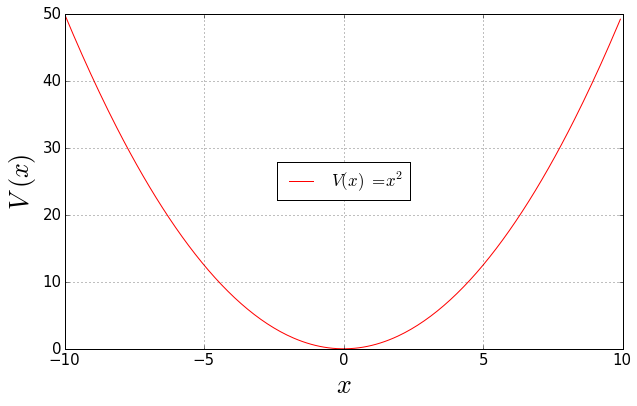

In [49]:

plt.figure(figsize=(10,6))
plt.plot( ifftshift(X_range), Potential(ifftshift(X_range)) ,"r",label = '$V(x) \\ = x^2 $' )
xlabel('$x$')
ylabel('$V \\ (x)$')
legend(loc = "center")
grid('on')


### 5. Plot functions

In [50]:

def PlotWigner(W):
    """
    Display the Wigner function plot.
    
    W -> Wigner fuction.
    
    H -> Classical Hamiltonian.
    """
    import scipy.fftpack as fftpack
    
    print "Imaginary volume = ",np.sum(np.abs(np.imag(W)))
    
    Classical_hamiltonian = fftshift( Kinetic(P) + Potential(X) )
    
    W = fftpack.fftshift( W.real )
    
    plt.figure(figsize=(10,7))
    
    global_color_max = np.max(W)     # Maximum value used at the colorbar
    
    global_color_min = np.min(W)    # Minimum value used at the colorbar
    
    
    # Set the global clor min to 2% of the max
    
    global_color_min = min(global_color_min, -0.02*abs(global_color_max))
                 
    zero_position =  abs( global_color_min) / (abs( global_color_max) + abs(global_color_min)) 
    
    wigner_cdict = {'red' 	: 	((0., 0., 0.),
							(zero_position, 1., 1.), 
							(1., 1., 1.)),
					'green' :	((0., 0., 0.),
							(zero_position, 1., 1.),
							(1., 0., 0.)),
					'blue'	:	((0., 1., 1.),
							(zero_position, 1., 1.),
							(1., 0., 0.)) }
    wigner_cmap = matplotlib.colors.LinearSegmentedColormap('wigner_colormap', wigner_cdict, 256)

    fig, ax = plt.subplots(figsize=(12, 5))
    
    x_min = -X_amplitude
    
    x_max = X_amplitude - dX
    
    p_min = -P_amplitude
    
    p_max = P_amplitude - dP
    
    cax = ax.imshow( W ,origin='lower',interpolation='none',
                    extent=[ x_min , x_max, p_min, p_max],
                    vmin= global_color_min, vmax=global_color_max, cmap=wigner_cmap)
    
    cbar = fig.colorbar(cax, ticks=[-0.2,-0.1, 0, 0.1, 0.2 , 0.3 ])
    
    xlabel("$x  \\ (a.u.) $")
    
    ylabel("$p  \\ (a.u.)$")
    
    #ax.contour( Classical_hamiltonian  ,arange(0, 100 , 10 ),origin='lower',
     #           extent=[x_min,x_max,p_min,p_max],
    #           linewidths=0.25,colors='k')
    
    print 'min real value of W  = ', np.min( W ), ' max real value of W = ', np.max( W )
    
    print 'Renormalization = ', np.sum( W )*dX*dP
    
    return 


In [51]:

def PlotHusimi(W):
    """
    Display the Wigner function plot.
    
    W -> Wigner fuction.
    
    H -> Classical Hamiltonian.
    """
    import scipy.fftpack as fftpack
    
    print "Imaginary volume = ",np.sum(np.abs(np.imag(W)))
    
    Classical_hamiltonian = fftshift( Kinetic(P) + Potential(X) )
    
    W = fftpack.fftshift( W.real )
    
    plt.figure(figsize=(10,7))
    
    global_color_max = np.max(W)     # Maximum value used at the colorbar
    
    global_color_min = np.min(W)    # Minimum value used at the colorbar
    
    
    # Set the global clor min to 2% of the max
    
    global_color_min = min(global_color_min, - 0.02*abs(global_color_max))
                 
    zero_position =  abs( global_color_min) / (abs( global_color_max) + abs(global_color_min)) 
    
    wigner_cdict = {'red' 	: 	((0., 0., 0.),
							(zero_position, 1., 1.), 
							(1., 1., 1.)),
					'green' :	((0., 0., 0.),
							(zero_position, 1., 1.),
							(1., 0., 0.)),
					'blue'	:	((0., 1., 1.),
							(zero_position, 1., 1.),
							(1., 0., 0.)) }
    wigner_cmap = matplotlib.colors.LinearSegmentedColormap('wigner_colormap', wigner_cdict, 256)

    fig, ax = plt.subplots(figsize=(12, 5))
    
    x_min = -X_amplitude
    
    x_max = X_amplitude - dX
    
    p_min = -P_amplitude
    
    p_max = P_amplitude - dP
    
    cax = ax.imshow( W ,origin='lower',interpolation='none',
                    extent=[ x_min , x_max, p_min, p_max],
                    vmin= global_color_min, vmax=global_color_max, cmap=wigner_cmap)
    
    #cbar = fig.colorbar(cax, ticks=[0, 0.01, 0.02 , 0.03 ])
    
    cbar = fig.colorbar( cax )
    
    xlabel("$x  \\ (a.u.) $")
    
    ylabel("$p  \\ (a.u.)$")
    
    #ax.contour( Classical_hamiltonian  ,arange(0, 100 , 10 ),origin='lower',
     #           extent=[x_min,x_max,p_min,p_max],
    #           linewidths=0.25,colors='k')
    
    
    print 'min real value of W  = ', np.min( W ), ' max real value of W = ', np.max( W )
    
    print 'Renormalization = ', np.sum( W )*dX*dP
    
    return 


In [52]:

def Marginals_plot(W):
    """
    Plot marginals W_x and W_y 
    """
    import scipy.fftpack as fftpack
    
    print "Imaginary volume:", np.sum(np.imag(W))
    
    W = np.real(W) 
    
    # Marginals W_x
    
    W_x = np.sum( W, axis = 0 )*dP
    
    # Marginals W_p
    
    W_p = np.sum( W, axis = 1 )*dX 
    
    # Plots 
    
    plt.figure(figsize=(20,7))

    ax1 = subplot(121)
    
    plot( ifftshift(X_range) ,fftshift(W_x).real,'r', label = '$ W_{x}$' ) 
        
    xlabel('$x  (a.u.)$')
    
    ylabel('$ W_{x}$')
    
    legend(loc = "upper right")
    

    ax2 = subplot(122)
    
    plot( ifftshift(P_range),fftshift(W_p).real ,'r',label = '$ W_{p} $' )
    
    xlabel('$p  (a.u.)$')
    
    ylabel('$ W_{p} $')
    
    legend(loc = "upper right")
    
    return 
       

## 6. States functions


In [53]:

def Wigner_gaussian(x,p,s):
    """
    Wigner function of a Gaussian
    x,p  : center of wave packet
    s    : Standard deviation 
    """
    return np.exp(  -( (X-x)/s )**2 -( s*(P-p) )**2  )


def  Wigner_HarmonicOscillator(n,mass,omega,x,p,X,P):
    """
    Wigner function of the Harmonic oscillator
            Parameters
            x,p  : center of wave packet
            n    : Quantum number  
    """
    r2 = mass*omega**2*((X - x))**2 + ((P - p ))**2/mass 
    return  (-1)**(n)*laguerre(n)( 2*r2  )*np.exp(-r2 )


# 7. Initial Wigner function $W(x,p)$

In [54]:

#****************** 1.Define the inital Wigner funcion *****************************

n = 5  # Quantum number

x_init = 0

p_init = 0

s = 1

W_init = Wigner_HarmonicOscillator(n,mass,omega,x_init,p_init,X,P)

norm   = np.sum( W_init )*dX*dP

W_init /= norm

# Print features

print "W Energy",(np.sum(P**2*W_init)*dP*dX)/(2*mass) + np.sum(Potential(X)*W_init)*dP*dX

print "W, Renormalization norm :",np.sum( W_init )*dX*dP

print "W Purity :", 2*np.pi*np.sum(W_init**2)*dX*dP


W Energy 5.5
W, Renormalization norm : 1.0
W Purity : 1.0


Imaginary volume =  0.0
min real value of W  =  -0.318309886184  max real value of W =  0.128477221341
Renormalization =  1.0


(-8, 8)

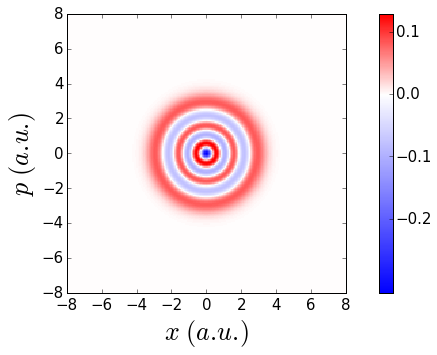

In [55]:

PlotWigner( W_init )

xlim([-8,8])

ylim([-8,8])


# 8. Initial Husimi function: $W(x,p)$ --->$Q(x,p)$

In [56]:

#***************************8. Husimi function ****************************************

# 8.1  take the ifft2 of W 

husimi_init = fftpack.ifft2( W_init  )

# 8.2  Filtering with a NEGATIVE gaussian W_ifft2

husimi_init = np.exp(  -(hbar*Theta/2.)**2/(s**2) - s**2*(hbar*Lambda/2.)**2  )*husimi_init        

# 8.3 Take a final fft2

husimi_init = fftpack.fft2(husimi_init)

# Print features

print ""

print "Husimi renormalization norm :", np.sum(husimi_init.real)*dX*dP

print "Imaginary volume of Husimi function :", np.sum(  np.abs( np.imag(husimi_init) )  )

print "Positive volume of Husimi function: ", np.sum(husimi_init[np.nonzero( husimi_init.real > 0. )]).real*dP*dX      

print "Negative volume of Husimi function: ", np.sum(husimi_init[np.nonzero( husimi_init.real < 0. )]).real*dP*dX 

print "Min value of Husimi function :", np.min( husimi_init.real )



Husimi renormalization norm : 1.0
Imaginary volume of Husimi function : 2.26150209933e-13
Positive volume of Husimi function:  1.0
Negative volume of Husimi function:  -4.44181389078e-17
Min value of Husimi function : -1.56125112838e-17


Imaginary volume =  2.26150209933e-13
min real value of W  =  -1.56125112838e-17  max real value of W =  0.0279264482441
Renormalization =  1.0


(-8, 8)

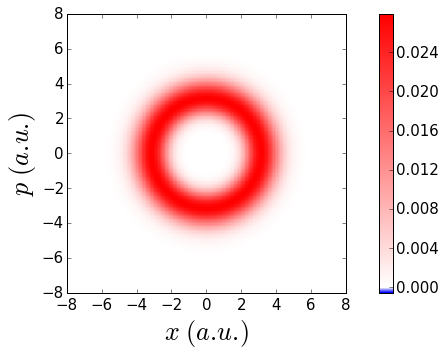

In [57]:

# Plot real part of Husimi funcion

PlotHusimi( husimi_init )

xlim([-8,8])

ylim([-8,8])


# 9.Glauber-Sudarshan: $W(x,p)$ ---> $P(x,p)$

In [58]:
#**********************9 Glauber-Sudarshan function ****************************************

# 9.1  take the fft2 of W 

glauber_init = fftpack.fft2( W_init  )

# 2.2  Filtering with a gaussian 

glauber_init = np.exp(  -(X/2.)**2/(s**2) -s**2*(P/2.)**2  )*glauber_init        

# 2.3 Take a final ifft2

glauber_init = fftpack.ifft2(glauber_init)

# Print features

print ""

print "Glauber renormalization norm :", np.sum(glauber_init.real)*dX*dP

print "Imaginary volume of Glauber function :", np.sum(  np.abs( np.imag(glauber_init) )  )

print "Positive volume of Glauber function: ", np.sum(glauber_init[np.nonzero( glauber_init.real > 0. )]).real*dP*dX      

print "Negative volume of Glauber function: ", np.sum(glauber_init[np.nonzero( glauber_init.real < 0. )]).real*dP*dX 

print "Min value of Glauber function :", np.min( glauber_init.real )



Glauber renormalization norm : 1.0
Imaginary volume of Glauber function : 3.50869665539e-13
Positive volume of Glauber function:  1.43252985142
Negative volume of Glauber function:  -0.432529851424
Min value of Glauber function : -0.161388595799


Imaginary volume =  3.50869665539e-13
min real value of W  =  -0.161388595799  max real value of W =  0.071783707934
Renormalization =  1.0


(-8, 8)

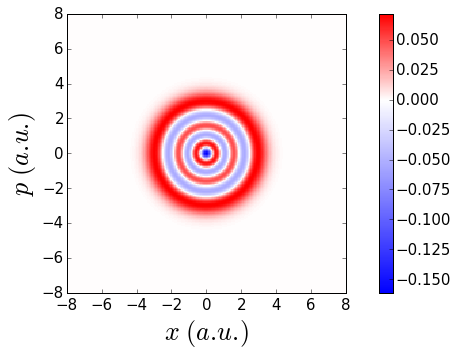

In [59]:

# Plot real part of Glauber-Sudarshan funcion

PlotHusimi( glauber_init )

xlim([-8,8])

ylim([-8,8])


# 10. Now let's go from $P(x,p)$ ---> $Q(x,p)$

In [60]:
#**********************10. Husimi function ****************************************

# 10.1  take the fft2 of W 

Q_init = fftpack.fft2( glauber_init  )

# 10.2  Filtering with a gaussian 

Q_init = np.exp(  -(hbar*Theta/2.)**2/(s**2) - s**2*(hbar*Lambda/2.)**2  )*Q_init        

# 10.3 Take a final ifft2

Q_init = fftpack.ifft2(Q_init)

# Print features

print ""

print "Husimi renormalization norm :", np.sum(Q_init.real)*dX*dP

print "Imaginary volume of Husimi function :", np.sum(  np.abs( np.imag(Q_init) )  )

print "Positive volume of Husimi function: ", np.sum(Q_init[np.nonzero( Q_init.real > 0. )]).real*dP*dX      

print "Negative volume of Husimi function: ", np.sum(Q_init[np.nonzero( Q_init.real < 0. )]).real*dP*dX 

print "Min value of Husimi function :", np.min( Q_init.real )



Husimi renormalization norm : 1.0
Imaginary volume of Husimi function : 2.34297689817e-13
Positive volume of Husimi function:  1.0
Negative volume of Husimi function:  -1.5728833816e-17
Min value of Husimi function : -6.93889390391e-18


Imaginary volume =  2.34297689817e-13
min real value of W  =  -6.93889390391e-18  max real value of W =  0.0271011484136
Renormalization =  1.0


(-8, 8)

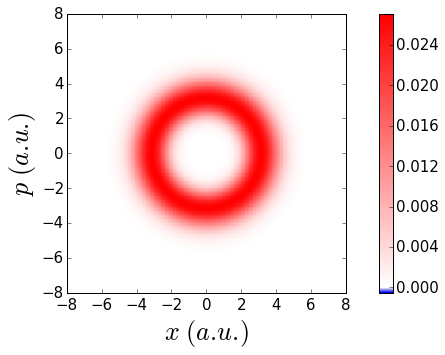

In [61]:

# Plot real part of Glauber-Sudarshan funcion

PlotHusimi( Q_init )

xlim([-8,8])

ylim([-8,8])


# 11. Wigner Propagator ( 2nd order scheme )

# 11.1 First choose the initial state: $W(x,p), P(x,p)$ or $Q(x,p)$

In [62]:

#Initial_state = W_init.copy() + 0j

#Initial_state = glauber_init.copy() + 0j

Initial_state = husimi_init.copy() + 0j

#Initial_state = Q_init.copy() + 0j


In [63]:

# Set the inital state to be propagated

W = Initial_state.copy() + 0j


# Propagators factors

expPLambda = np.exp(-1j*dt*P*Lambda/mass)

expPotential =  np.exp( -1j*(dt/2) * ( Potential(X-hbar*Theta/2.) \
                                      - Potential(X+hbar*Theta/2.) )/hbar  )

In [64]:
# Lists to save expectation values

data_Expectation_X=[np.sum(X*W)*dP*dX]

data_Expectation_X2=[np.sum(X**2*W)*dP*dX]

data_Expectation_P=[np.sum(P*W)*dP*dX]

data_Expectation_P2=[np.sum(P**2*W)*dP*dX]

data_Expectation_XP=[np.sum(X*P*W)*dP*dX]

data_Expectation_PX=[np.sum(P*X*W)*dP*dX]

#------------------------------------------------------

data_Expectation_F=[-1*np.sum(dPotentialdx(X)*W)*dP*dX]

Probability_x = np.sum( W, axis = 0 )*dP

data_Expectation_PdVdX=[ np.sum( P*dPotentialdx(X)*W)*dP*dX ]

data_Expectation_XdVdX=[ np.sum( X*dPotentialdx(X)*W )*dP*dX ]

data_Expectation_V=[ np.sum( Potential(X) *W)*dP*dX ]


#-------------------------------------------------------

data_NegArea = [np.sum(W[np.nonzero( W.real < 0. )]).real*dP*dX]

data_Integral_W2 = [np.sum(W**2)*dX*dP]

# Propagator

for tIndex in range(1,timeSteps+1):
    if tIndex%100==0:
        print '  tIndex  = ', tIndex         
        
    Probability_x = np.sum( W, axis = 0 )*dP
    
    # p x -> theta x
    
    W = fftpack.fft( W, axis = 0 )
    
    W *= expPotential
    
    # theta x  -> p x
    
    W = fftpack.ifft( W, axis = 0 )
    
    # p x  ->  p lambda 
    
    W = fftpack.fft( W, axis = 1 )
    
    W *=expPLambda
    
    # p lambda -> p x 
    
    W = fftpack.ifft( W, axis = 1 )
    
    
    # p x -> theta x
    
    W = fftpack.fft( W, axis = 0 )
    
    W *= expPotential

    # theta x -> p x
    
    W = fftpack.ifft( W, axis = 0 )
    
    # Current expectations values
        
    Expectation_X = np.sum(X*W)*dP*dX
    
    Expectation_X2=np.sum(X**2*W)*dP*dX
    
    Expectation_P = np.sum(P*W)*dP*dX
    
    Expectation_P2= np.sum(P**2*W)*dP*dX
    
    Expectation_XP= np.sum(X*P*W)*dP*dX
    
    Expectation_PX= np.sum(P*X*W)*dP*dX
    
    #---------------------------------------------------
            
    Expectation_F= -1*np.sum(dPotentialdx(X)*W)*dP*dX 
        
    Expectation_XdVdX= np.sum(X*dPotentialdx(X)*W)*dP*dX 
    
    Expectation_PdVdX= np.sum(P*dPotentialdx(X)*W)*dP*dX 
    
    Expectation_V = np.sum( Potential(X)*W )*dP*dX
    
    #---------------------------------------------------
    
    Integral_W2 = np.sum(W**2)*dX*dP
    
    NegArea = np.sum(W[np.nonzero( W.real < 0. )]).real*dP*dX
        
    # Store the expectation values
      
    data_Expectation_X.append(Expectation_X)  
    
    data_Expectation_X2.append(Expectation_X2) 
    
    data_Expectation_P.append(Expectation_P)
    
    data_Expectation_P2.append(Expectation_P2) 
    
    data_Expectation_XP.append(Expectation_XP) 
    
    data_Expectation_PX.append(Expectation_PX)
    
    data_Expectation_F.append(Expectation_F)   
    
    data_Expectation_XdVdX.append(Expectation_XdVdX) 
    
    data_Expectation_PdVdX.append(Expectation_PdVdX)
    
    data_Expectation_V.append(Expectation_V)
    
    data_Integral_W2.append(Integral_W2)
    
    data_NegArea.append(NegArea)
    
#---Final state

W_end = W 
print ' "W_end" renormalization norm: ',np.sum(W_end)*dX*dP

data_Expectation_X      = np.array(data_Expectation_X).real
data_Expectation_X2     = np.array(data_Expectation_X2).real
data_Expectation_P      = np.array(data_Expectation_P).real
data_Expectation_P2     = np.array(data_Expectation_P2).real
data_Expectation_XP     = np.array(data_Expectation_XP).real
data_Expectation_PX     = np.array(data_Expectation_PX).real
data_Expectation_F      = np.array(data_Expectation_F).real
data_Expectation_XdVdX  = np.array(data_Expectation_XdVdX).real
data_Expectation_PdVdX  = np.array(data_Expectation_PdVdX).real
data_Expectation_V      = np.array(data_Expectation_V).real
data_NegArea            = np.array(data_NegArea).real


  tIndex  =  100
  tIndex  =  200
  tIndex  =  300
 "W_end" renormalization norm:  (1+2.46519032882e-30j)


## 11.2 Final  state

Imaginary volume =  1.00423876922e-11
min real value of W  =  -9.50658958021e-17  max real value of W =  0.0279264814489
Renormalization =  1.0


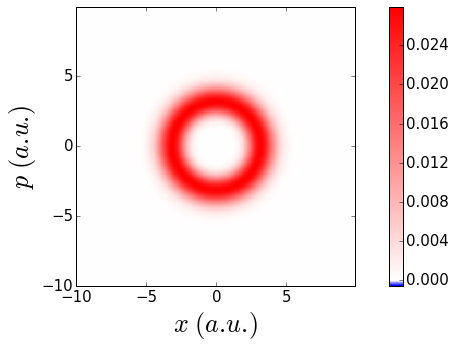

In [65]:

PlotHusimi( W_end )

#xlim([-5,5])

#ylim([-5,5])


## 11.3 Comparing initial and final marginals

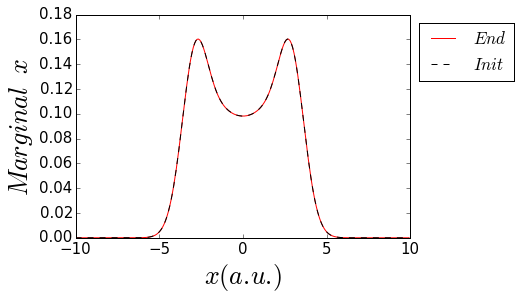

In [66]:

plot( ifftshift(X_range) ,fftshift(np.sum( W_end, axis = 0 )*dP).real,'r', label = '$ End }$' ) 

plot( ifftshift(X_range) ,fftshift(np.sum( Initial_state, axis = 0 )*dP).real,'k--', label = '$ Init $' ) 

xlabel('$x  (a.u.)$')
    
ylabel('$ Marginal \ \ x $')

legend(loc='upper left', bbox_to_anchor=(1,1))


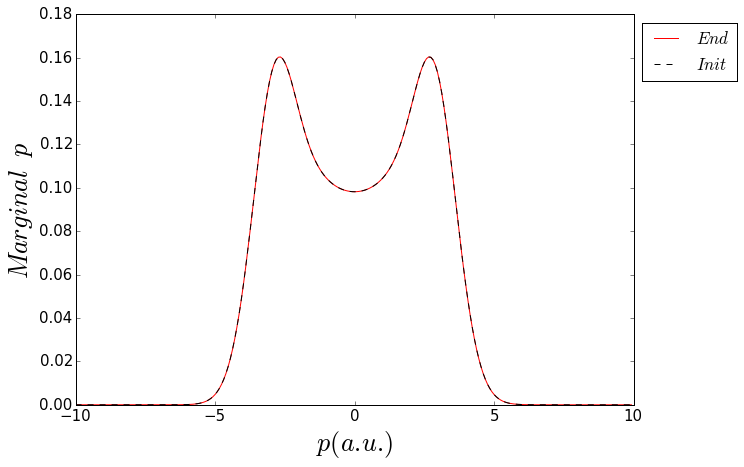

In [67]:

# Plot y marginal

plt.figure(figsize=(10,7))

plt.plot( ifftshift(X_range) ,fftshift(np.sum( W_end, axis = 1 )*dX).real,'r', label = '$ End $' ) 

plt.plot( ifftshift(X_range) ,fftshift(np.sum( Initial_state, axis = 1 )*dX).real,'k--', label = '$ Init $' ) 

plt.xlabel('$p  (a.u.)$')
    
plt.ylabel('$ Marginal \ \ p $')

legend(loc='upper left', bbox_to_anchor=(1,1))


## 11.4 Print probability's negative volume

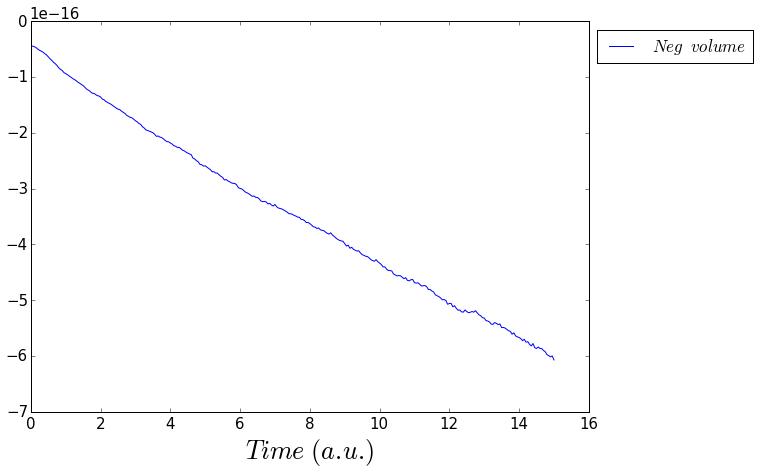

In [68]:

plt.figure(figsize=(10,7))

plot(  timeRange, np.real( data_NegArea ) ,'b', label = '$ Neg \ \ volume $'  )   

#ylim ([0.95,1.25])

xlabel("$Time \\ (a.u.)$")

legend(loc='upper left', bbox_to_anchor=(1,1))


### 12. Energy plots
### 12.1 Total energy 

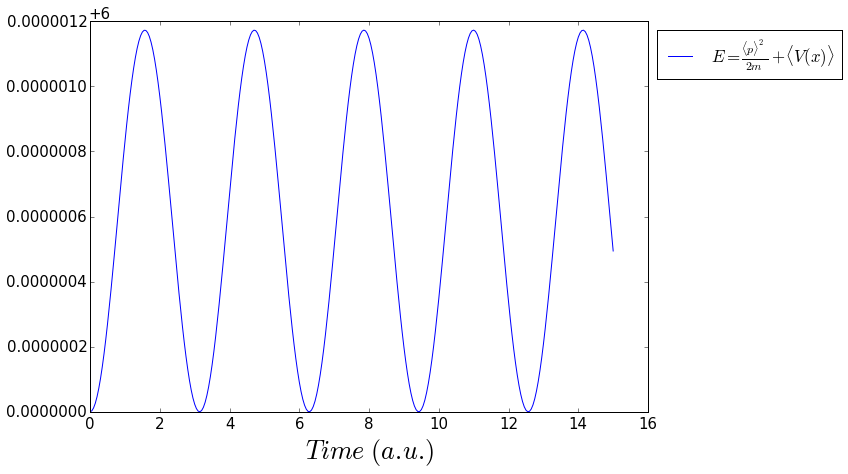

In [69]:

plt.figure(figsize=(10,7))

Total_energy = data_Expectation_P2/(2*mass) + data_Expectation_V

plot(  timeRange, np.real( Total_energy ) ,'b', label = '$ E= \\frac{\\langle p \\rangle^2}{2m} + \\langle V(x)\\rangle  $'  )   

#ylim ([0.95,1.25])

xlabel("$Time \\ (a.u.)$")

legend(loc='upper left', bbox_to_anchor=(1,1))


### 13. Average values plots

In [70]:
  
# 1 st:

data_Expectation_dXdt = np.gradient(data_Expectation_X,dt) 
data_Expectation_P_mass = np.array( data_Expectation_P )/mass
    
# 2 nd:

data_Expectation_dPdt =np.gradient(data_Expectation_P,dt)

    
# 3 rd :

data_Expectation_dX2dt = np.gradient(data_Expectation_X2,dt)
data_Expectation_XP_PX_m = 2*np.array(data_Expectation_XP)/mass

# 4 th: 

data_Expectation_dP2dt= np.gradient(data_Expectation_P2,dt)
data_Expectation_pdVdx_dVdxp= -2*np.array(data_Expectation_PdVdX)
    
# Virial:
    
data_Expectation_d_PX_XP_dt = np.array(np.gradient(data_Expectation_XP,dt))+ np.array(np.gradient(data_Expectation_PX,dt))  
data_Expectation_virial = 2*np.array(data_Expectation_P2)/mass -2*np.array(data_Expectation_XdVdX)
    
    
# Uncertainty Principle

data_Expectation_sigmaX_sigmaP = np.sqrt(np.array(data_Expectation_X2).real- np.array(data_Expectation_X).real**2) * np.sqrt(np.array(data_Expectation_P2).real - np.array(data_Expectation_P).real**2)  
    
    
# Purity 

data_purity = 2*np.pi*np.array(data_Integral_W2)


Ehrenfest's theorems: 
    
$$ \frac{d \langle x \rangle }{dt}=\frac{\langle p\rangle}{m}  $$

$$ \frac{d \langle p \rangle}{dt} = -\langle U'(x) \rangle $$

$$ \frac{d \langle x^2 \rangle}{dt} = \frac{1}{m}\langle x p  +  p x \rangle $$

$$ \frac{d \langle p^2 \rangle }{dt} =  - \langle pU'(x) + U'(x)p \rangle $$

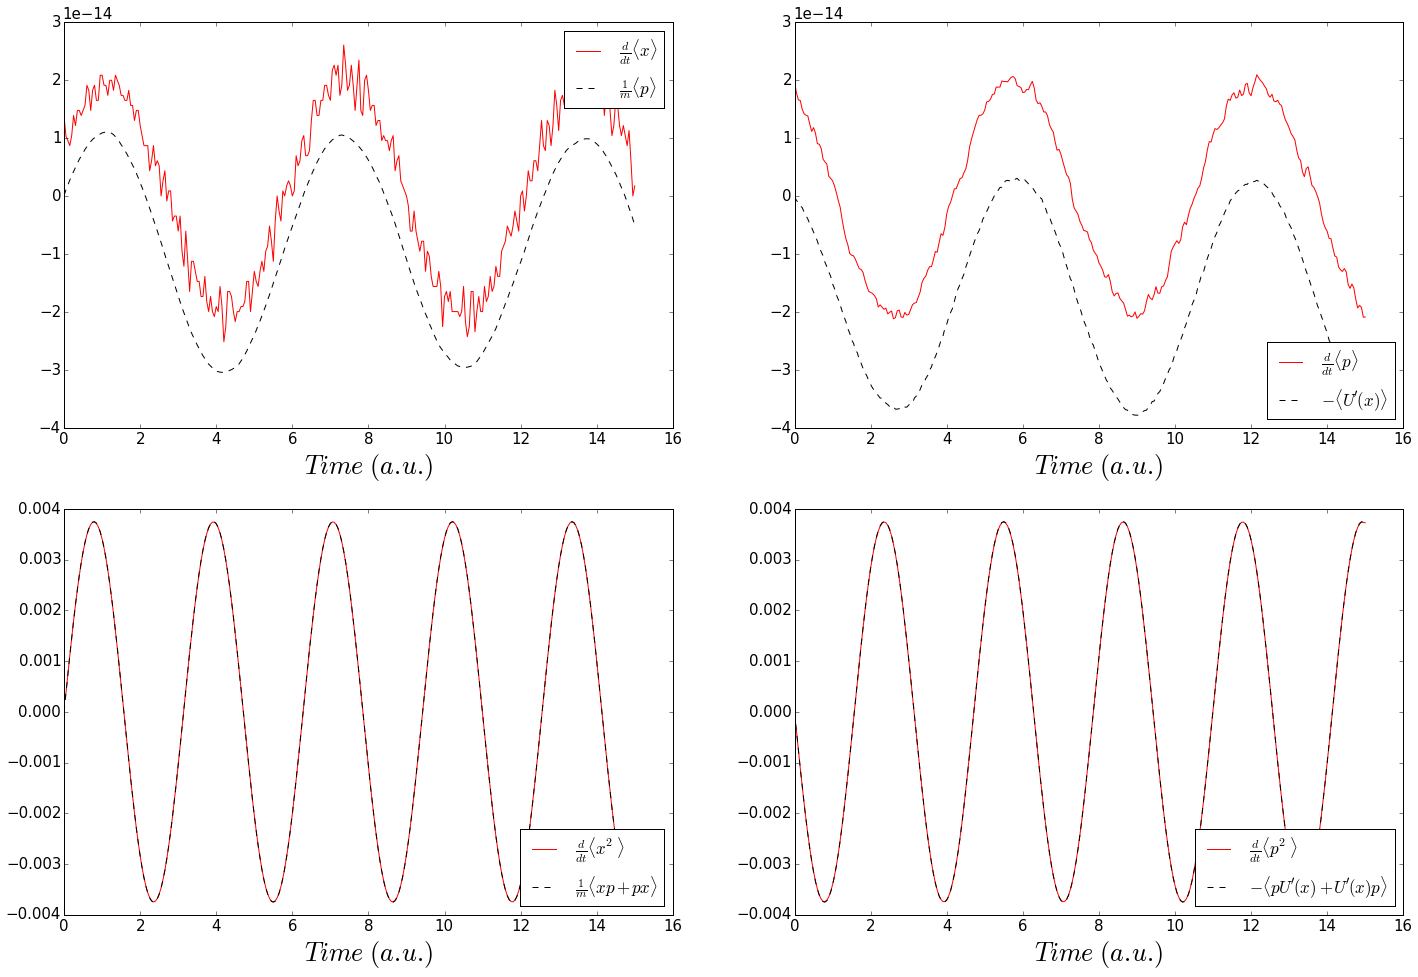

In [71]:
# Plots 

plt.figure(figsize=(24,16))

ax1 = subplot(221)

plot(  timeRange,  data_Expectation_dXdt , 'r',label = '$ \\frac{d}{dt} \\langle x \\rangle $'  )
plot(  timeRange,  data_Expectation_P_mass  ,'k--', label = '$ \\frac{1}{m} \\langle p \\rangle $'  )
xlabel("$Time \\ (a.u.)$")
legend(loc = "upper right")

ax2 = subplot(222)

plot(timeRange, data_Expectation_dPdt  ,'r'   , label = '$ \\frac{d}{dt} \\langle p \\rangle $' )
plot(timeRange, data_Expectation_F , 'k--',label = "$ -\\langle  U'(x) \\rangle $" )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax3 = subplot(223)

plot(timeRange, data_Expectation_dX2dt ,'r',label = '$ \\frac{d}{dt} \\langle x^2 \\rangle $' )
plot(timeRange, data_Expectation_XP_PX_m  ,'k--',label = '$ \\frac{1}{m} \\langle xp   + px \\rangle $' )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax4 = subplot(224)

plot( timeRange, data_Expectation_dP2dt ,'r',label = '$ \\frac{d}{dt} \\langle p^2 \\rangle $' )
plot(timeRange,  data_Expectation_pdVdx_dVdxp,'k--',label = "$ -\\langle pU'(x) + U'(x)p \\rangle $" )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")


Virial theorem :
$$ \frac{d }{dt}\langle x p + p x  \rangle  =  \frac{ \\2 \langle p^2 \rangle }{m} - 2 \langle x V'(x) \rangle  $$
Purity condition:
$$2\pi \hbar \int W^{2}(x,p)dxdp=1$$
Uncertainty principle:
$$  \sigma_x \sigma_p  \geqslant   0.5 $$

Min sigmaXsigmaP : 6.0

Min value of Purity= (0.123046875+2.05877619133e-15j) Max. value of Purity= (0.123046875-6.77074028102e-18j)


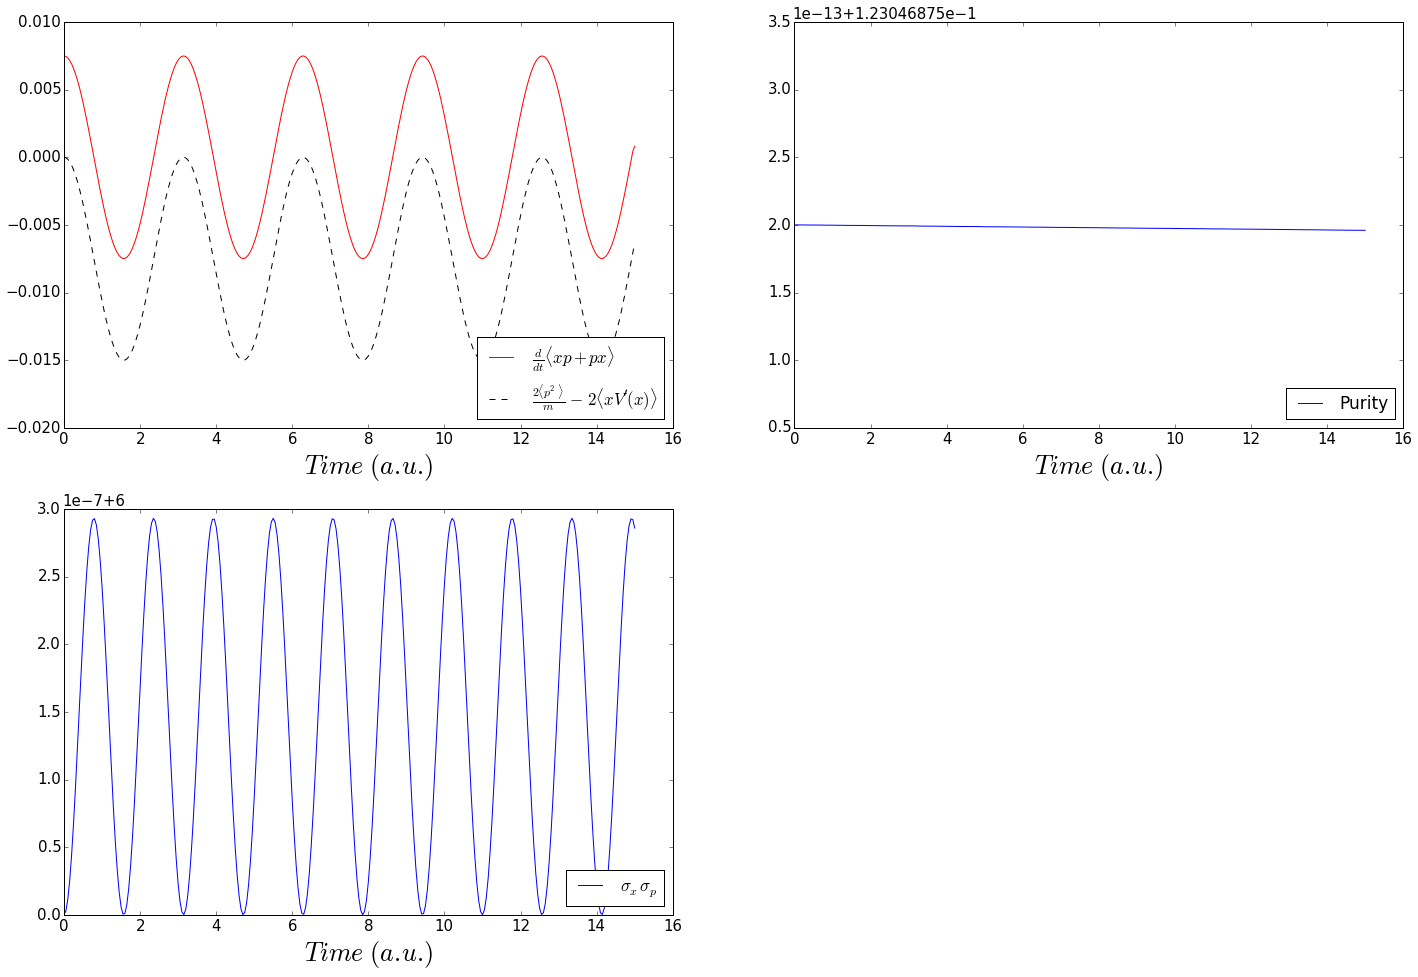

In [72]:
plt.figure(figsize=(24,16))

ax1 = subplot(221)

plot(timeRange, data_Expectation_d_PX_XP_dt,'r',label = '$ \\frac{d}{dt} \\langle xp + px \\rangle $' )
plot( timeRange, data_Expectation_virial,'k--',
                 label = "$ \\frac{ 2\\langle p^2 \\rangle}{m} \\ - \\ 2 \\langle x V'(x) \\rangle $" )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax2 = subplot(222)

plot( timeRange, data_purity.real, label = 'Purity' )
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

ax3 = subplot(223)

plot( timeRange, data_Expectation_sigmaX_sigmaP.real, label = '$ \sigma_x \sigma_p $')
xlabel("$Time \\ (a.u.)$")
legend(loc = "lower right")

print "Min sigmaXsigmaP :" ,np.min(data_Expectation_sigmaX_sigmaP.real)
print ""
print "Min value of Purity=", np.min(data_purity) ,  "Max. value of Purity=", np.max(data_purity)
